In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
weather_df = pd.read_csv("/home/raghu/Downloads/Datasets/weather/weatherAUS.csv")     

In [4]:
weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
weather_df.dropna(subset=['RainTomorrow','RainToday'], inplace=True)

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [8]:
px.histogram( weather_df,
    x = 'Location',
    title = "location counts",
    color='RainToday'
)

<AxesSubplot: xlabel='Date', ylabel='count'>

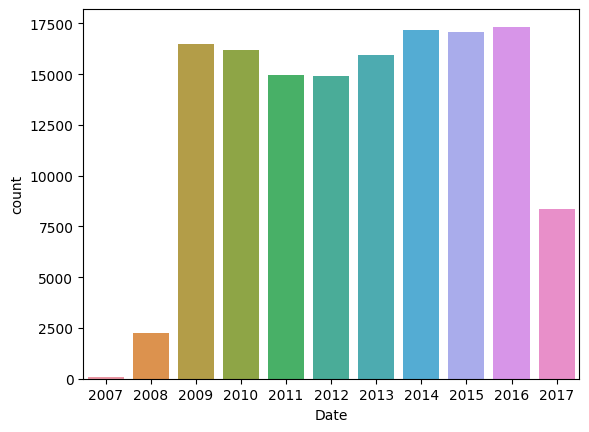

In [9]:
sns.countplot(x= pd.to_datetime(weather_df.Date).dt.year)

In [10]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year<2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

data separation

In [11]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets =val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [13]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [14]:
px.histogram( weather_df, x = 'RainTomorrow', title = 'RainToday vs Raintomorrow', color = "RainToday")

In [15]:
numerical_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [16]:
train_inputs[numerical_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [17]:
#7654321 7373521
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')


In [18]:
imputer.fit(weather_df[numerical_cols])

SimpleImputer()

In [19]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [20]:
train_inputs[numerical_cols].isna().sum()      

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [21]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6     5.472516   7.63054   
1        Albury      7.4     25.1       0.0     5.472516   7.63054   
2        Albury     12.9     25.7       0.0     5.472516   7.63054   
3        Albury      9.2     28.0       0.0     5.472516   7.63054   
4        Albury     17.5     32.3       1.0     5.472516   7.63054   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0     5.472516   7.63054   
144549    Uluru     15.1     36.8       0.0     5.472516   7.63054   
144550    Uluru     17.3     37.8       0.0     5.472516   7.63054   
144551    Uluru     20.1     38.5       0.0     5.472516   7.63054   
144552    Uluru     22.5     39.6       0.0     5.472516   7.63054   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1  8.000000   
1              44.0         25.0       1010.6       1007.8  4.431161   
2              38.0         30.0       1007.6       1008.7  4.431161   
3              45.0         16.0       1017.6       1012.8  4.431161   
4              82.0         33.0       1010.8       1006.0  7.000000   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8  4.431161   
144549         16.0          8.0       1012.6       1007.6  4.431161   
144550         15.0          8.0       1011.9       1008.0  4.431161   
144551         22.0          9.0       1014.0       1009.2  4.431161   
144552         16.0          9.0       1012.1       1006.2  4.431161   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0        4.49925     16.9     21.8         No  
1        4.49925     17.2     24.3         No  
2        2.00000     21.0     23.2         No  
3        4.49925     18.1     26.5         No  
4        8.00000     17.8     29.7         No  
...          ...      ...      ...        ...  
144548   4.49925     23.7     31.8         No  
144549   4.49925     28.9     34.8         No  
144550   4.49925     29.7     35.7         No  
144551   4.49925     29.8     37.2         No  
144552   4.49925     30.1     37.4         No  

[97988 rows x 21 columns]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
scaler.fit(weather_df[numerical_cols])

MinMaxScaler()

In [24]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [25]:
train_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [26]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W       0.294574          W        WNW  ...      0.275862   
1              WNW       0.294574        NNW        WSW  ...      0.252874   
2              WSW       0.310078          W        WSW  ...      0.298851   
3               NE       0.139535         SE          E  ...      0.103448   
4                W       0.271318        ENE         NW  ...      0.229885   
...            ...            ...        ...        ...  ...           ...   
144548         SSE       0.286822        ESE        SSE  ...      0.298851   
144549          NE       0.193798        ENE         SW  ...      0.229885   
144550         ESE       0.255814        ESE        SSE  ...      0.103448   
144551         ESE       0.286822        ESE        SSW  ...      0.195402   
144552         WNW       0.542636        ENE        SSW  ...      0.149425   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              0.71         0.22     0.449587       0.4800  0.888889   
1              0.44         0.25     0.497521       0.4912  0.492351   
2              0.38         0.30     0.447934       0.5056  0.492351   
3              0.45         0.16     0.613223       0.5712  0.492351   
4              0.82         0.33     0.500826       0.4624  0.777778   
...             ...          ...          ...          ...       ...   
144548         0.22         0.13     0.555372       0.5232  0.492351   
144549         0.16         0.08     0.530579       0.4880  0.492351   
144550         0.15         0.08     0.519008       0.4944  0.492351   
144551         0.22         0.09     0.553719       0.5136  0.492351   
144552         0.16         0.09     0.522314       0.4656  0.492351   

        Cloud3pm   Temp9am   Temp3pm  RainToday  
0       0.499917  0.508439  0.522073         No  
1       0.499917  0.514768  0.570058         No  
2       0.222222  0.594937  0.548944         No  
3       0.499917  0.533755  0.612284         No  
4       0.888889  0.527426  0.673704         No  
...          ...       ...       ...        ...  
144548  0.499917  0.651899  0.714012         No  
144549  0.499917  0.761603  0.771593         No  
144550  0.499917  0.778481  0.788868         No  
144551  0.499917  0.780591  0.817658         No  
144552  0.499917  0.786920  0.821497         No  

[97988 rows x 21 columns]

In [27]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
encoder.fit(weather_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [29]:
#one hot encoding 
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols
categorical_cols

/home/raghu/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [30]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('unknown'))

/tmp/ipykernel_3848/1304791748.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_3848/1304791748.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_3848/1304791748.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_3848/1304791748.py:1: PerformanceWarn

In [31]:
pd.set_option('display.max_column', None)
test_inputs  

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

training the model

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', random_state = 42)     

In [33]:
model.fit(train_inputs[numerical_cols + encoded_cols], train_targets)                     

DecisionTreeClassifier(random_state=42)

In [34]:
pred = model.predict(test_inputs[numerical_cols + encoded_cols])         
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, test_targets)                        
from sklearn.tree import plot_tree, export_text      

[Text(0.5, 0.9166666666666666, 'WindDir3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.75, 'WindDir3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.125, 0.5833333333333334, 'Evaporation <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985, 3672]'),
 Text(0.0625, 0.4166666666666667, 'WindSpeed3pm <= 0.58\ngini = 0.335\nsamples = 6010\nvalue = [4731, 1279]'),
 Text(0.03125, 0.25, 'WindSpeed3pm <= 0.442\ngini = 0.441\nsamples = 2658\nvalue = [1787, 871]'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'WindSpeed3pm <= 0.686\ngini = 0.214\nsamples = 3352\nvalue = [2944, 408]'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'Sunshine <= 0.391\ngini = 0.108\nsamples = 41647\nvalue = [39254, 2393]'),
 Text(0.15625, 0.25, 'Evaporation <= 0.679\n

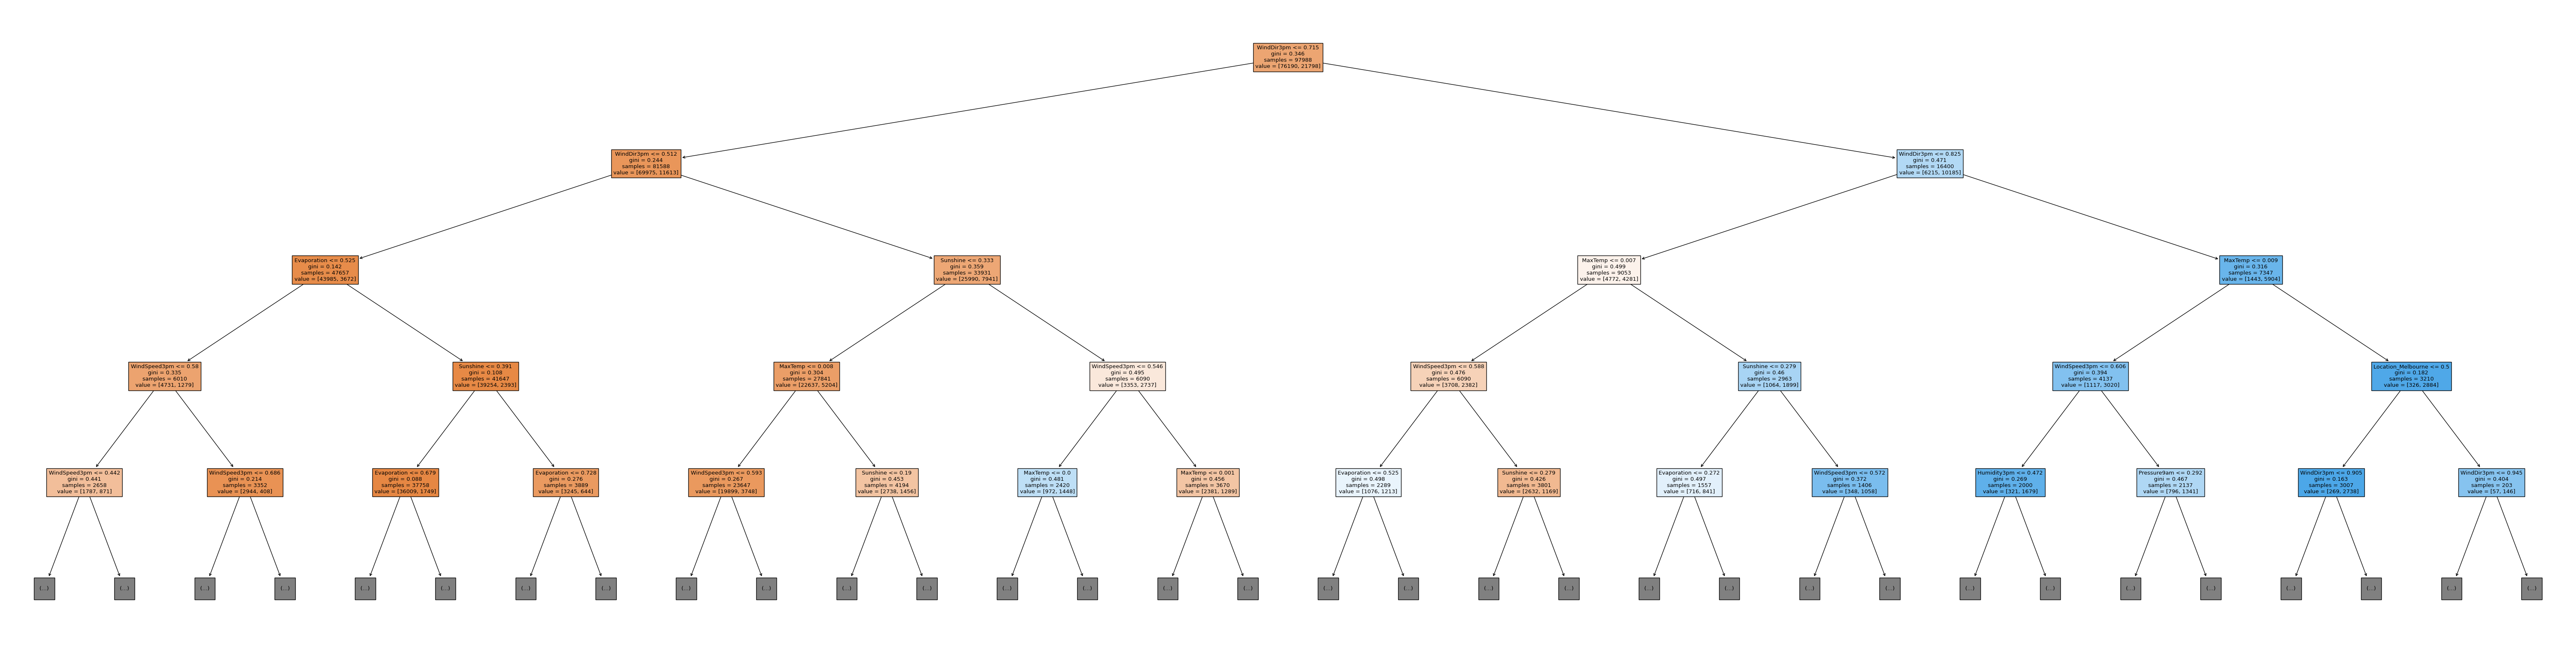

In [36]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names = train_inputs.columns, max_depth = 4, filled=True)        

In [40]:
model.tree_.max_depth

49

In [41]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [42]:
model.fit(train_inputs[numerical_cols + encoded_cols], train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [44]:
model.score(train_inputs[numerical_cols + encoded_cols], train_targets)

0.8315916234640977

[Text(0.5, 0.875, 'WindDir3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]\nclass = No'),
 Text(0.25, 0.625, 'WindDir3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]\nclass = No'),
 Text(0.125, 0.375, 'Evaporation <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985, 3672]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.335\nsamples = 6010\nvalue = [4731, 1279]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.108\nsamples = 41647\nvalue = [39254, 2393]\nclass = No'),
 Text(0.375, 0.375, 'Sunshine <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.304\nsamples = 27841\nvalue = [22637, 5204]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 6090\nvalue = [3353, 2737]\nclass = No'),
 Text(0.75, 0.625, 'WindDir3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]\nclass = Yes'),
 Text(0.625, 0.375, 'MaxTemp <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]\nclass

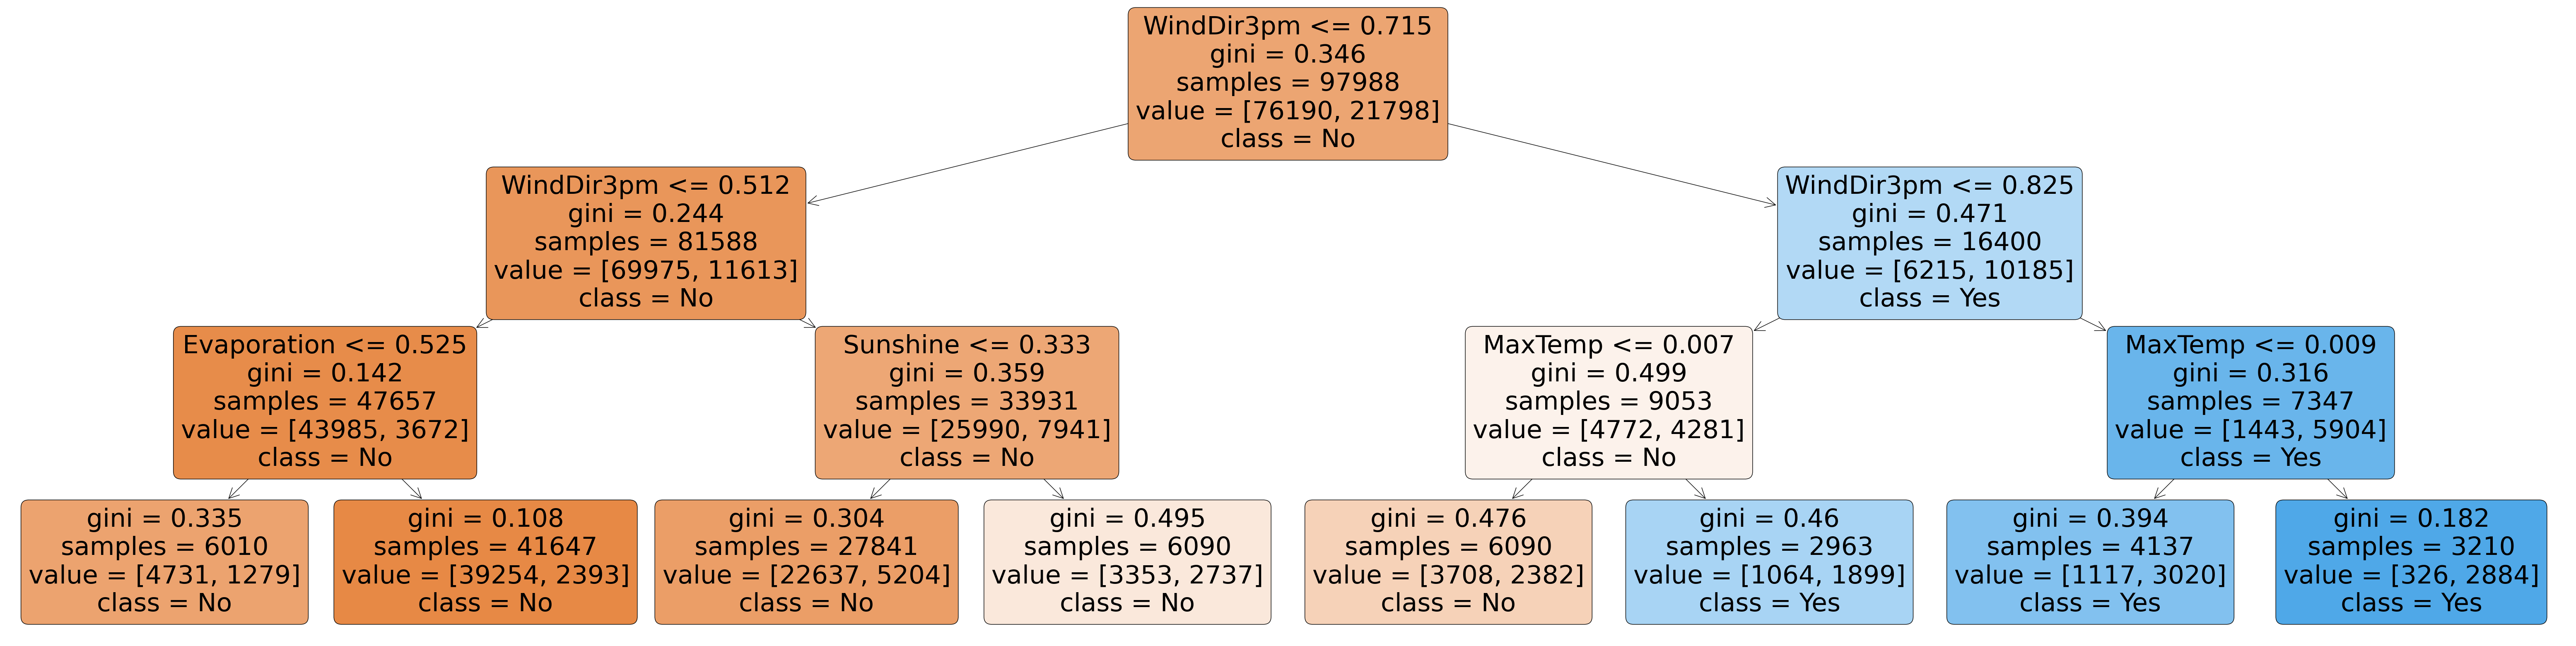

In [50]:
plt.figure(figsize = (80,20))
plot_tree(model, feature_names = train_inputs.columns, filled = True, rounded = True, class_names = model.classes_)

In [53]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md, random_state= 42)
    model.fit(train_inputs[numerical_cols + encoded_cols], train_targets)
    train_error = 1 - model.score(train_inputs[numerical_cols + encoded_cols], train_targets)
    val_error = 1 - model.score(val_inputs[numerical_cols + encoded_cols], val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}


In [55]:
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [56]:
error_df

Max Depth  Training Error  Validation Error
0           1        0.181941          0.176488
1           2        0.176930          0.170695
2           3        0.168408          0.165194
3           4        0.162153          0.161624
4           5        0.157244          0.158113
5           6        0.153131          0.155890
6           7        0.149059          0.154661
7           8        0.144814          0.154193
8           9        0.139435          0.154485
9          10        0.131812          0.154953
10         11        0.122740          0.157002
11         12        0.113044          0.159518
12         13        0.102237          0.165604
13         14        0.090868          0.167652
14         15        0.079847          0.170695
15         16        0.068590          0.177073
16         17        0.057864          0.177131
17         18        0.049537          0.181579
18         19        0.040862          0.183627
19         20        0.033871          0.188542

Text(0.5, 0, 'Max. Depth')

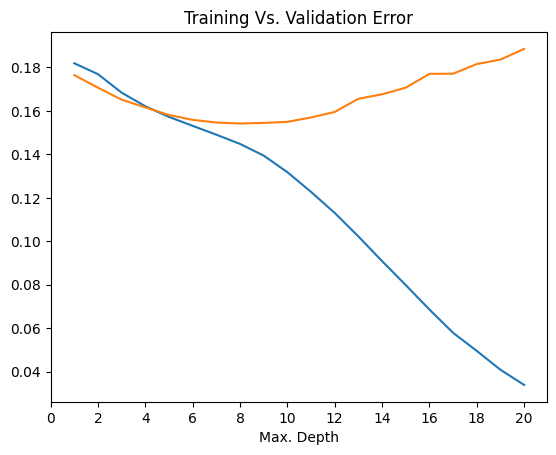

In [57]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title("Training Vs. Validation Error")
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')


In [60]:
model =DecisionTreeClassifier(max_depth = 7, random_state = 42).fit(train_inputs[numerical_cols + encoded_cols], train_targets)
model.score(train_inputs[numerical_cols + encoded_cols], train_targets)

0.8509409315426378

In [62]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state = 42)
model.fit(train_inputs[numerical_cols + encoded_cols], train_targets)  

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [63]:
model.score(train_inputs[numerical_cols + encoded_cols], train_targets)

0.852696248520227

In [64]:
model.score(val_inputs[numerical_cols + encoded_cols], val_targets)

0.8471531394464276

In [65]:
model.tree_.max_depth

11

In [68]:
model_text = export_text(model, feature_names = list(train_inputs[numerical_cols + encoded_cols].columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

In [70]:
pred = model.predict(test_inputs[numerical_cols + encoded_cols])

In [73]:
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
pd.DataFrame(pred, test_targets, columns = ['pred'])

pred
RainTomorrow     
No             No
Yes            No
Yes            No
Yes            No
No             No
...           ...
No             No
No             No
No             No
No             No
No             No

[25710 rows x 1 columns]